# Classification Model Project
* Student name: Tara Mullin
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger 
* Blog post URL: TBD

## Project Goal




Select a dataset of your choosing and create a classification model. Start by identifying a problem that can be solved with classification, and then identify a dataset.

*OSEMN Method - Obtain, Scrub, Explore, Model, iNterpret*

1) Source a dataset

2) Preprocess and explore the data

3) Feature Engineering

4) Build & interpret classification models that answer selected question

## Question

**Predicting contraceptive method**

The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.

### Data set

This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview.

Predictors:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=low, 2, 3, 4=high
3. Husband's education (categorical) 1=low, 2, 3, 4=high
4. Number of children ever born (numerical)
5. Wife's religion (binary) 0=Non-Islam, 1=Islam
6. Wife's now working? (binary) 0=Yes, 1=No
7. Husband's occupation (categorical) 1, 2, 3, 4
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
9. Media exposure (binary) 0=Good, 1=Not good

Target:
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term



## Import & Explore Data

In [11]:
#minimal cleaning, not the point of this project
#get a feel for the data, check out distributions of each feature
#(~5 hours)

In [24]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [25]:
#import data

df = pd.read_csv('contraceptive_use.csv')
df.head()

,wife_age,wife_edu,husband_edu,num_children_born,wife_religion,wife_now_working,husband_occupation,standard_living,media_exposure,contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [26]:
df.describe()

,wife_age,wife_edu,husband_edu,num_children_born,wife_religion,wife_now_working,husband_occupation,standard_living,media_exposure,contraceptive_method_used
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
wife_age                     1473 non-null int64
wife_edu                     1473 non-null int64
husband_edu                  1473 non-null int64
num_children_born            1473 non-null int64
wife_religion                1473 non-null int64
wife_now_working             1473 non-null int64
husband_occupation           1473 non-null int64
standard_living              1473 non-null int64
media_exposure               1473 non-null int64
contraceptive_method_used    1473 non-null int64
dtypes: int64(10)
memory usage: 115.2 KB


In [28]:
#check for missing values

df.isna().sum()

wife_age                     0
wife_edu                     0
husband_edu                  0
num_children_born            0
wife_religion                0
wife_now_working             0
husband_occupation           0
standard_living              0
media_exposure               0
contraceptive_method_used    0
dtype: int64

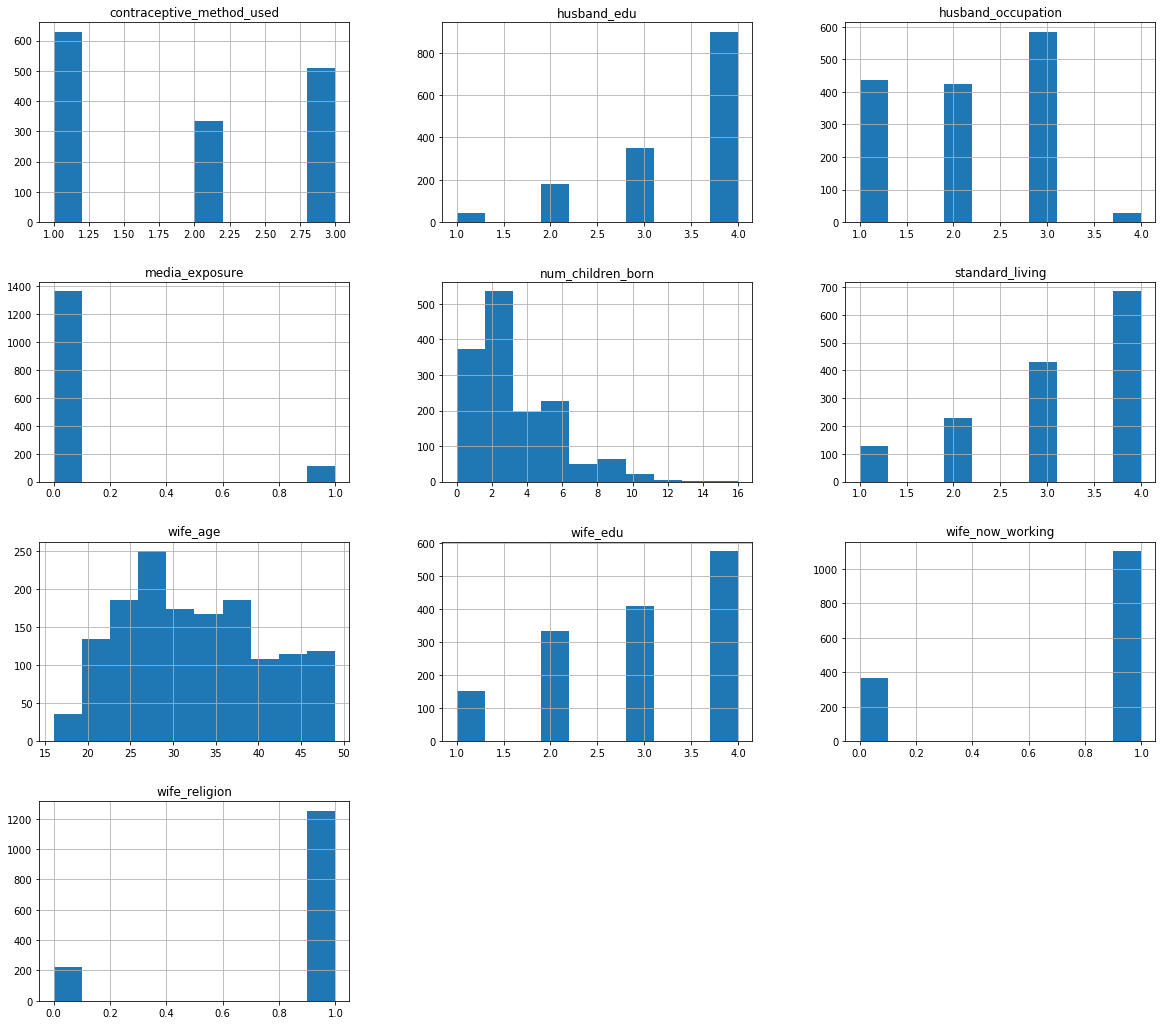

In [29]:
#how is the data distributed?
df.hist(figsize = (20,18));

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


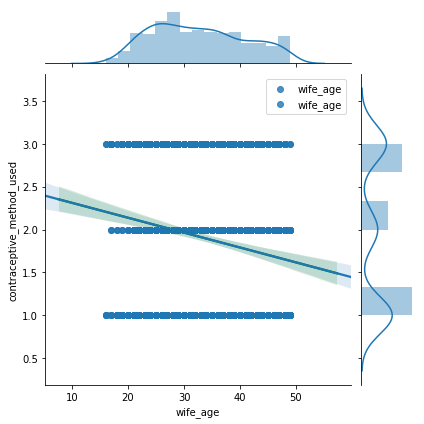

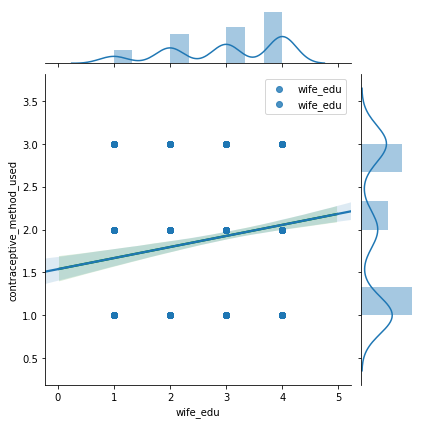

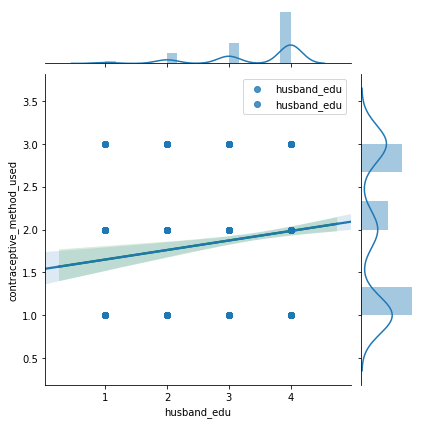

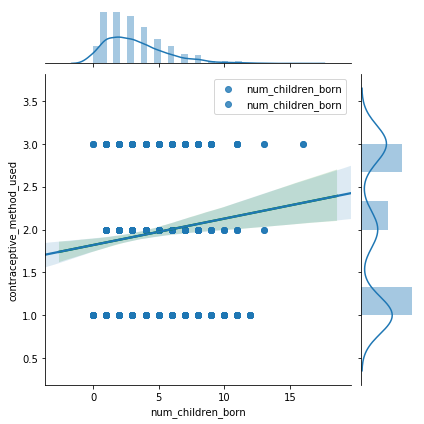

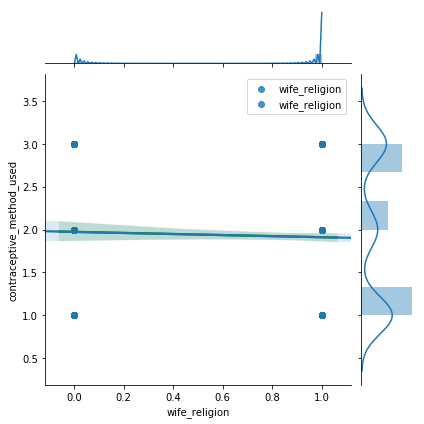

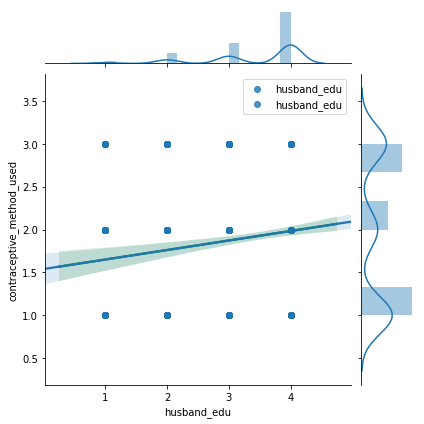

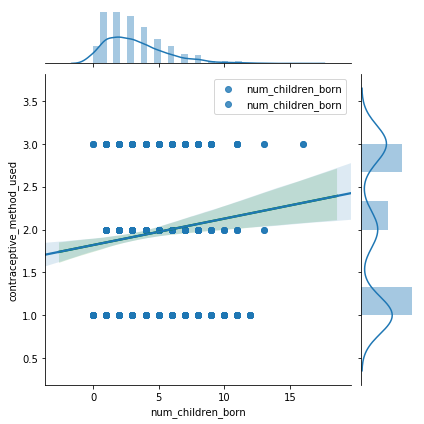

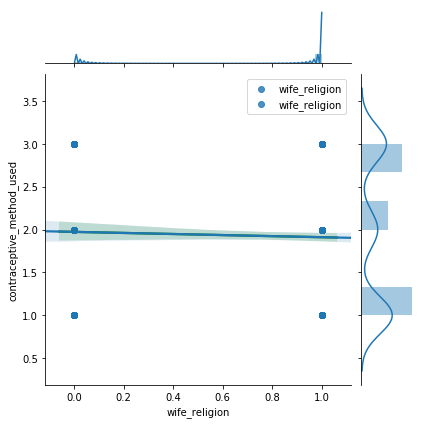

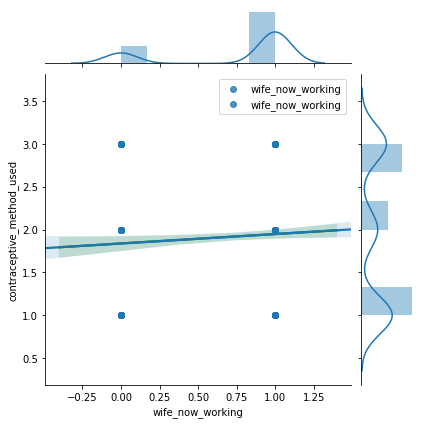

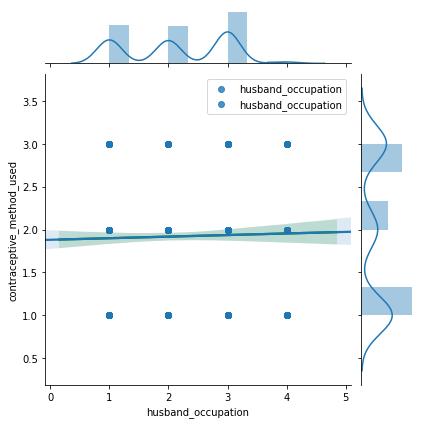

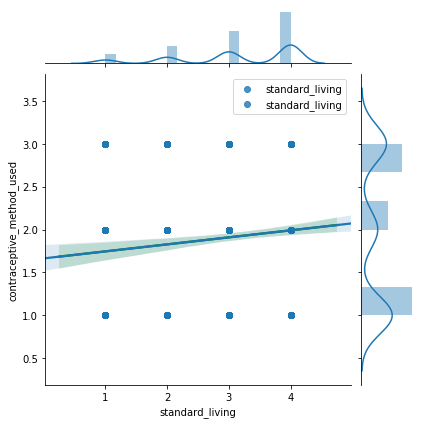

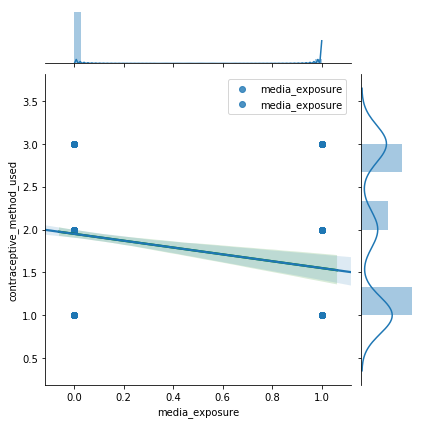

In [30]:
for column in ['wife_age', 'wife_edu', 'husband_edu', 'num_children_born', 'wife_religion', 'husband_edu', 'num_children_born', 
               'wife_religion', 'wife_now_working', 'husband_occupation', 'standard_living', 'media_exposure']:
    sns.jointplot(x=column, y="contraceptive_method_used",
                 data=df,
                 kind='reg',
                 label=column,
                 joint_kws={'line_kws':{'color':'green'}})
    sns.regplot(df[column], df.contraceptive_method_used, label=column)
    plt.legend()
    plt.show()

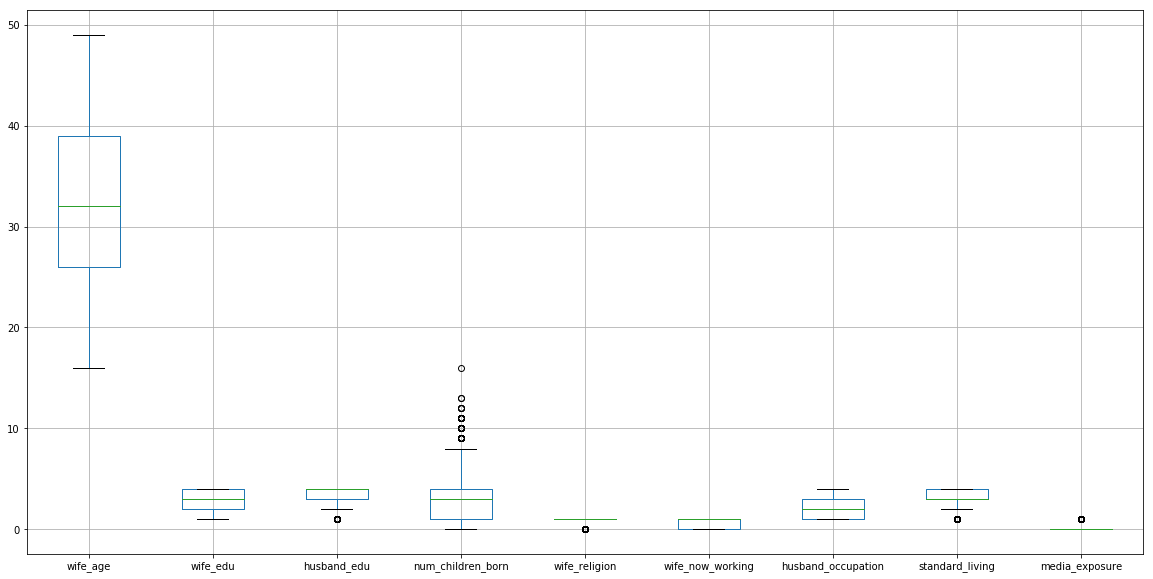

In [31]:
# Let's use a box plot to examine the relationship between year built and price
#benefit of box plot: show outliers and where majority of your data lies
features = df.drop(columns=['contraceptive_method_used'], axis=1)
features.boxplot(figsize = (20,10));

## Feature Engineering - PCA

What columns should be included in the model?

In [19]:
#PCA
#shouldn't do much in the way of creating your own features
#2-3 hours

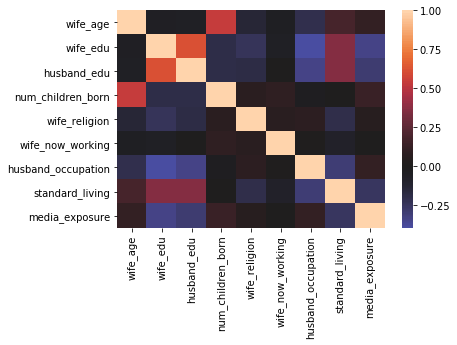

In [32]:
#correlation between features
sns.heatmap(features.corr(), center=0);

Correlation is observed between the following variables:

- wife's age and the number of children ever born
- wife's education and husband's education
- wife's education/husband's education and standard of living

All of these correlations make sense logically and because they are all under about 0.6, I decided to leave them all in the model.

#### Principal Component Analysis

In [33]:
# Split the data into target(y) and predictors (X)
y = df['contraceptive_method_used']
X = df.drop(columns=['contraceptive_method_used'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=22)

from sklearn.decomposition import PCA

pca = PCA ()
X_pca = pca.fit_transform(X_train)

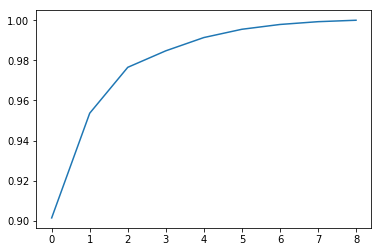

In [34]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [35]:
#Determine the number of features to capture 95% of the variance

total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance >= .95])
n_to_reach_95 = X.shape[1] - n_over_95 + 1
print("Number features: {}\tTotal Variance Explained: {}".format(n_to_reach_95, total_explained_variance[n_to_reach_95-1]))

Number features: 2	Total Variance Explained: 0.9536214671293985


## Classification Models

### Logistic Regression Model

#### Model

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# Split the data into target(y) and predictors (X)
y = df['contraceptive_method_used']
X = df.drop(columns=['contraceptive_method_used'], axis=1)

In [38]:
#normalize the data prior to fitting the model
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X.head()

,wife_age,wife_edu,husband_edu,num_children_born,wife_religion,wife_now_working,husband_occupation,standard_living,media_exposure
0,0.242424,0.333333,0.666667,0.1875,1.0,1.0,0.333333,0.666667,0.0
1,0.878788,0.000000,0.666667,0.6250,1.0,1.0,0.666667,1.000000,0.0
2,0.818182,0.333333,0.666667,0.4375,1.0,1.0,0.666667,1.000000,0.0
3,0.787879,0.666667,0.333333,0.5625,1.0,1.0,0.666667,0.666667,0.0
4,0.606061,0.666667,0.666667,0.5000,1.0,1.0,0.666667,0.333333,0.0


In [39]:
#Train-Test Split
# Assign 25% to the test set (default)
# Set random_stat to 0 (WHY??)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
# Fit the Model
# Instantiate LogisticRegression
# don't include the intercept
# set C to a very large number 
# use 'liblinear' solver

#Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

#fit the model
logreg.fit(X_train, y_train)

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### Evaluate Model Performance - accuracy, percision, recall, confusion matrix

In [41]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [42]:
# How many times was the classifier correct on the training set?

# Subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))


0    564
2    286
1    254
Name: contraceptive_method_used, dtype: int64
------------------------------------
0    0.510870
2    0.259058
1    0.230072
Name: contraceptive_method_used, dtype: float64


In [43]:
#How many times was the classifier correct on the test set?

# Subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0    189
2     91
1     89
Name: contraceptive_method_used, dtype: int64
------------------------------------
0    0.512195
2    0.246612
1    0.241192
Name: contraceptive_method_used, dtype: float64


In [44]:
#Function to calculate precision

def precision(y, y_hat):
    #could also use confusion matrix here
    y_y_hat = list(zip(y,y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp =sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    return tp / float(tp + fp)

In [45]:
# Function to calculate recall

def recall(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn)

In [46]:
# Function to calculate accuracy

def accuracy(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_hat))

In [47]:
# Function to calculate F1 score

def f1(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

In [49]:
#Generate predictions and calculate precision, recall, accuracy, and F1 score of your classifier

y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))



Training Precision:  0.5
Testing Precision:  0.5



Training Recall:  1.0
Testing Recall:  1.0



Training Accuracy:  0.2572463768115942
Testing Accuracy:  0.3008130081300813



Training F1-Score:  0.6666666666666666
Testing F1-Score:  0.6666666666666666


In [50]:
#Create the confusion matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[111   8  43]
 [ 33  25  38]
 [ 48  10  53]]


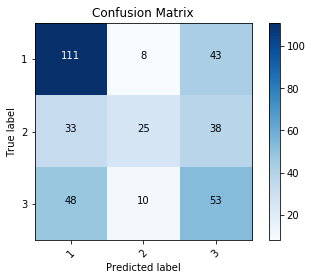

In [51]:
import itertools

# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

In [52]:
#Define a general function that plots the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show()

Normalized confusion matrix
[[0.68518519 0.04938272 0.2654321 ]
 [0.34375    0.26041667 0.39583333]
 [0.43243243 0.09009009 0.47747748]]


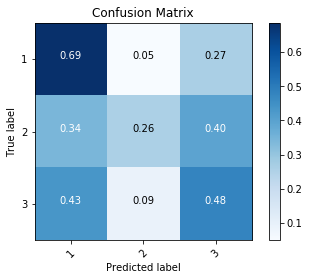

In [53]:
# Plot a normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

#### Interpretation 

### Random Forest Model

#### Import and Split Data

In [2]:
#import data

df = pd.read_csv('contraceptive_use.csv')
df.head()

,wife_age,wife_edu,husband_edu,num_children_born,wife_religion,wife_now_working,husband_occupation,standard_living,media_exposure,contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [3]:
# Split the data into target(y) and predictors (X)
y = df['contraceptive_method_used']
X = df.drop(columns=['contraceptive_method_used'], axis=1)

In [4]:
#Train-Test Split
# Assign 25% to the test set (default)
# Set random_stat to 123 (WHY??)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#### Build a "regular" tree as a baseline

First fitting a regular decision tree classifier, so there is something to compare the ensemble methods to

In [6]:
# Instantiate and fit a DecisionTreeClassifer
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
#How important is each feature?

# Feature importance
tree_clf.feature_importances_

array([0.24503692, 0.22525514, 0.03551336, 0.39662778, 0.        ,
       0.01157731, 0.03709912, 0.04889037, 0.        ])

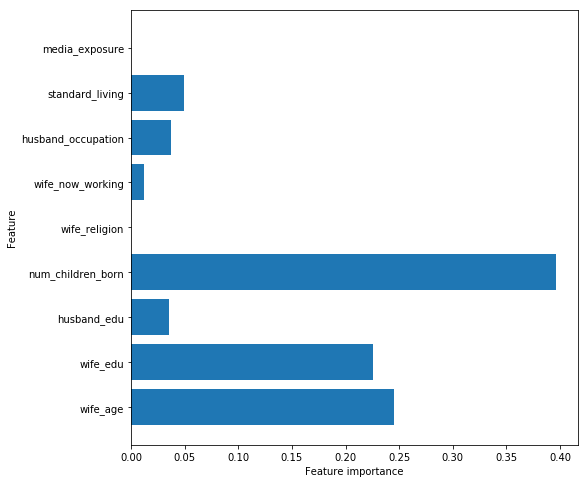

In [8]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

#### Evaluate Model Performance - accuracy, precision, recall, and confusion matrix

In [9]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[92 15 42]
 [14 34 38]
 [32 19 83]]
              precision    recall  f1-score   support

           1       0.67      0.62      0.64       149
           2       0.50      0.40      0.44        86
           3       0.51      0.62      0.56       134

   micro avg       0.57      0.57      0.57       369
   macro avg       0.56      0.54      0.55       369
weighted avg       0.57      0.57      0.56       369



In [10]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 56.64%


#### Random Forest Model

In [11]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Evaluate Model Performance - accuracy, precision, recall, and confusion matrix

In [12]:
# Training accuracy score
forest.score(X_train, y_train)

0.6141304347826086

In [13]:
# Test accuracy score
forest.score(X_test, y_test)

0.5528455284552846

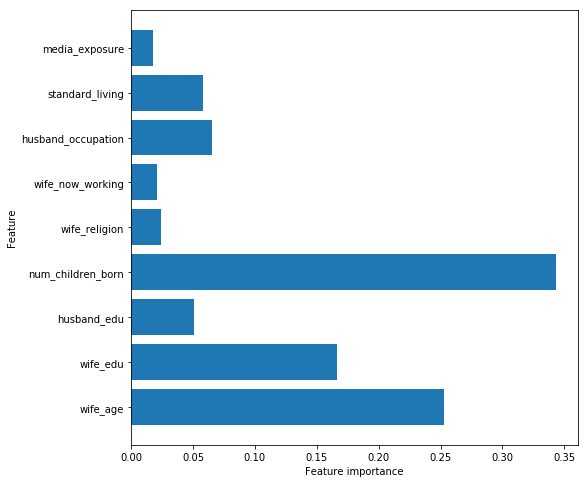

In [14]:
#Feature importance

plot_feature_importances(forest)

#### Random Forest Grid Search

In [16]:
randomforest_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [17]:
rf_grid_search = GridSearchCV(forest, randomforest_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 56.07%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 100}


In [18]:
#random forest grid search score on test data
rf_score = rf_grid_search.score(X_test, y_test)

print('Random forest grid search: ', rf_score)

Random forest grid search:  0.5663956639566395


The score is not very high, but at least it appears that the model is not overfitting since the training and testing scores are so close to one another.

### XGBoost Model

#### Model

In [3]:
#import data

df = pd.read_csv('contraceptive_use.csv')
df.head()

,wife_age,wife_edu,husband_edu,num_children_born,wife_religion,wife_now_working,husband_occupation,standard_living,media_exposure,contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [4]:
# Split the data into target(y) and predictors (X)
y = df['contraceptive_method_used']
X = df.drop(columns=['contraceptive_method_used'], axis=1)

In [5]:
#Train-Test Split
# Assign 25% to the test set (default)
# Set random_stat to 42 (WHY??)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from xgboost import XGBClassifier

# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 64.67%
Validation accuracy: 56.91%


## Grid Search with Selected Model

In [12]:
#pick 1 model you want to explore more and conduct grid sesarch
#grid search = hyperparameter tuning
#don't overload the grid
#relatively broad
#max two grid searchs
#2 hours

GridSearchCV finds the optimal combination of parameters by running an exhaustive combinatoric search - hyperparameter tuning

In [8]:
#define the parameters to be included in the grid search
#how do we chooose?

param_grid = {'learning_rate': [0.1,0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [9]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.5

Training Accuracy: 83.61%
Validation accuracy: 58.54%


## Evaluation - Deeper Dive

In [9]:
#Monday - Wednesday 
#4-6 hours
#e.g. XGBoost for grid search, print out for each estimator
#what nuances, which features important
#complexity graph - over or underfitting? (plot complexity vs error)
#with XGBoost, each estimator makes the model more complex

## Conclusions

## Future Directions